In [5]:
!pip3 install librosa

# Import required library

In [6]:
import librosa
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np

# Audio loading and visualization

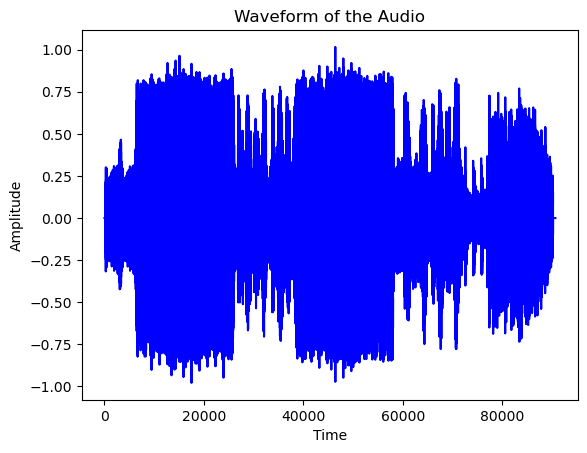

In [7]:
file_path='Travis Scott - HIGHEST IN THE ROOM (Official Music Video).mp3'
audio_data,sample_rate=librosa.load(file_path,sr=None)
time=librosa.times_like(audio_data,sr=sample_rate)
plt.plot(time, audio_data, color='b')
plt.title('Waveform of the Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Audio manipulation

In [8]:
speed=librosa.effects.time_stretch(y=audio_data,rate=2)
pitch=librosa.effects.pitch_shift(y=audio_data,sr=sample_rate,n_steps=3)
sf.write("Speed.mp3",speed,sample_rate)
sf.write("pitch.mp3",pitch,sample_rate)

In [9]:
delay=int(sample_rate*0.5)
echo=np.zeros_like(audio_data)
echo[delay:]=audio_data[:-delay]*0.5
audio_echo=audio_data+echo
sf.write('echo.mp3',audio_echo,sample_rate)

In [10]:
start=1
end=6
startSample=int(start*sample_rate)
endSample=int(end*sample_rate)
audio_trim=audio_data[startSample:endSample]
sf.write('trim.mp3',audio_trim,sample_rate)

In [11]:
silence=np.zeros(int(3*sample_rate))
audioSilence=np.concatenate((audio_data,silence))

noise=np.random.normal(0,0.1,audio_data.shape)
audioNoise=audio_data+noise

sf.write('Silence.mp3',audioSilence,sample_rate)
sf.write('noise.mp3',audioNoise,sample_rate)

# Spectral analysis

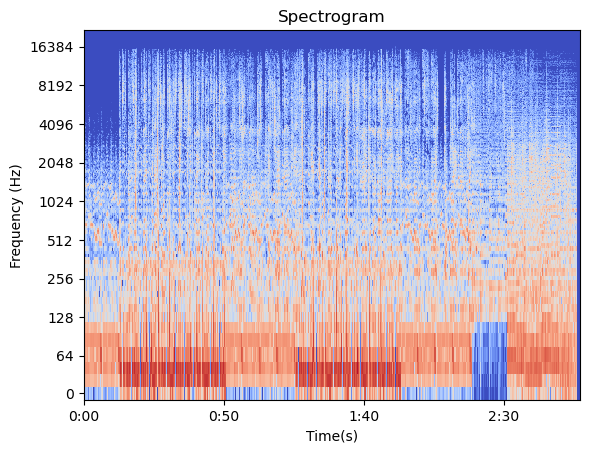

In [12]:
stft=librosa.stft(audio_data)
spectrogram=np.abs(stft)
db_spectrogram=librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(db_spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
plt.title('Spectrogram')
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')
plt.show()